In [14]:
import sys
from pathlib import Path
import os
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.load_data import load_uci_dataset
from src.data.preprocess import log_transform, zscore_normalize
from src.data.split_data import save_processed_data


In [15]:
X, y = load_uci_dataset(
    r"../Data/raw/data.csv",
    r"../Data/raw/labels.csv"
)

print("Feature matrix shape:", X.shape)
print("Label shape:", y.shape)


Feature matrix shape: (801, 20532)
Label shape: (801,)


In [16]:
assert X.shape[0] == y.shape[0], "Mismatch between samples and labels!"
print("✔ Data and labels are correctly aligned")


print("Missing values:", X.isnull().sum().sum())
print("Number of classes:", y.nunique())
print(y.head())
print(y.dtype)

✔ Data and labels are correctly aligned
Missing values: 0
Number of classes: 801
0    sample_0
1    sample_1
2    sample_2
3    sample_3
4    sample_4
Name: Unnamed: 0, dtype: object
object


In [17]:
# plt.figure(figsize=(6,4))
# sns.histplot(X.iloc[:, 0], bins=50)
# plt.title("Raw Gene Expression Distribution (Sample Gene)")
# plt.show()


### Log Transformation

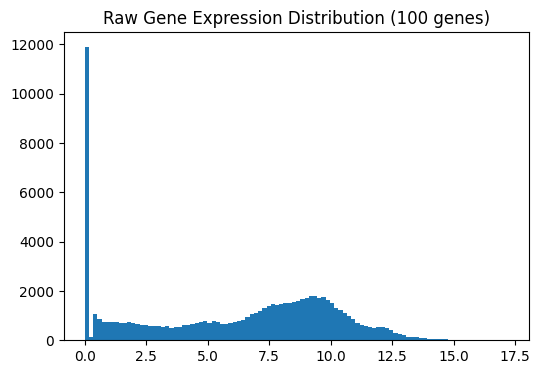

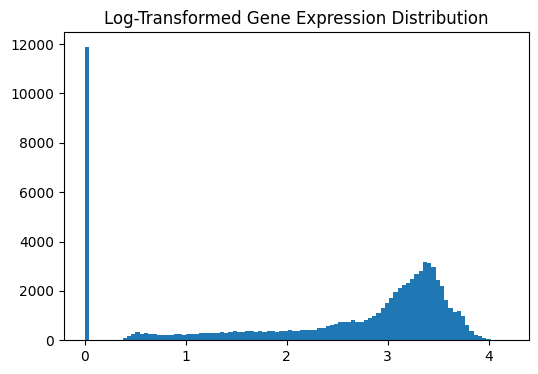

In [18]:
# Ensure numeric data
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)
X_numeric = X.fillna(0)
# Sample genes
sampled_genes = X.sample(n=100, axis=1, random_state=42)
values = sampled_genes.values.flatten()

# Raw distribution
plt.figure(figsize=(6,4))
plt.hist(values, bins=100)
plt.title("Raw Gene Expression Distribution (100 genes)")
plt.show()

# Log transform
X_log = np.log2(X_numeric + 1)

sampled_genes_log = X_log.sample(n=100, axis=1, random_state=42)
values_log = sampled_genes_log.values.flatten()

# Log distribution
plt.figure(figsize=(6,4))
plt.hist(values_log, bins=100)
plt.title("Log-Transformed Gene Expression Distribution")
plt.show()


### Z - score Normalization

In [19]:
X_norm = zscore_normalize(X_log)

print("Mean (approx):", X_norm.mean().mean())
print("Std (approx):", X_norm.std().mean())


Mean (approx): -1.3396894169761933e-18
Std (approx): 0.9875638537239041


In [20]:
save_processed_data(X_norm, y, "..\Data\processed")